In [8]:
import scipy as sp
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
plt.rc("font", size=10, family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 확률분포 클래스

종류|명령|확률분포
----|:----:|:--------:
이산|bernoulli|베르누이분포
이산|binom|이항분포
이산|multinomial|다항분포
연속|uniform|균일분포
연속|norm|정규분포
연속|beta|베타분포
연속|gamma|감마분포
연속|t|스튜던트 t분포
연속|chi2|카이 제곱분포
연속|f|F분포
연속|dirichlet|디리클리분포
연속|multivariate_normal|다변수 정규분포

# 모수 지정

확률분포 객체를 생성할 때는 분포의 형상을 구체적으로 지정하는 **모수(parameter)**를 인수로 주어야 한다. 각 확률분포마다 설정할 모수가 다르므로 자세한 설명은 사이파이 문서를 참조한다. 하지만 대부분 다음과 같은 모수를 공통적으로 가진다.

인수(모수)이름 |의미
---------------------|--------------
loc|일반적으로 분포의 기댓값
scale|일반적으로 분포의 표준편차

이 명령들은 모두 stats 서브패키지에 포함되어 있다. 예를 들어 정규분포 객체는 다음과 같이 생성한다.

In [6]:
rv = sp.stats.norm(loc=1, scale=2)

# 확률분포 메서드

|메서드|기능|
|:------:|:----:|
pmf|확률질량함수(probability mass function)
pdf|확률밀도함수(probability density function)
cdf|누적분포함수(cumulative distribution function)
ppf|누적분포함수의 역함수(inverse cumulative distribution function)
sf|생존함수(survival function) = 1 - 누적분포함수
isf|생존함수의 역함수(inverse survival function)
rvs|랜덤 표본 생성(random variable sampling)

# 확률밀도함수

pdf 메서드는 연속확률변수의 확률밀도함수의 역할을 한다. 표본 값을 입력하면 해당 표본 값에 대한 확률밀도를 출력한다.

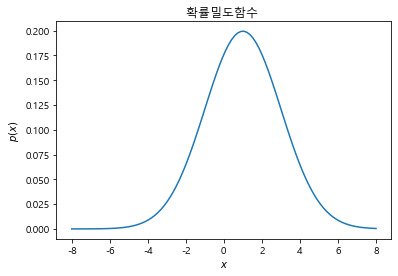

In [9]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

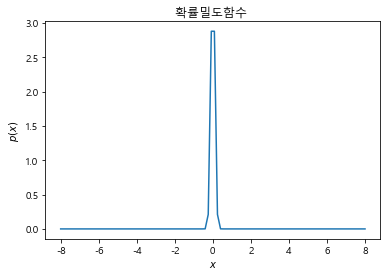

In [10]:
rv = sp.stats.norm(loc=0, scale=0.1)
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [11]:
rv.pdf(0)

3.989422804014327

# 누적분포함수

cdf 메서드는 이산확률변수와 연속확률변수의 누적분포함수의 역할을 한다. 표본 값을 입력하면 해당 표본 값에 대한 누적확률을 출력한다.

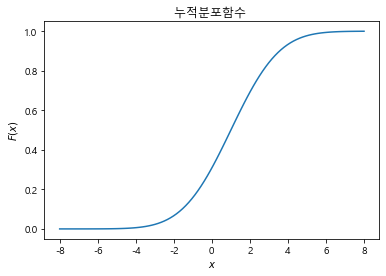

In [13]:
rv = sp.stats.norm(loc=1, scale=2)
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title("누적분포함수 ")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

# 무작위 표본 생성

무작위로 표본을 만들 때는 rvs(random value sampling) 메서드를 사용한다. 이 메서드에서 받는 인수는 다음과 같다.

인수|의미
:----:|:---:
size|표본 생성 시 생성될 표본 크기
random_state|표본 생성 시 사용되는 시드(seed)값

In [14]:
rv.rvs(size=(3, 5), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

D:\Anaconda\envs\minsu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


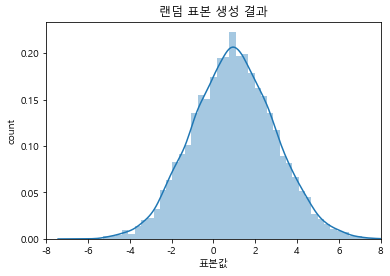

In [15]:
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("count")
plt.xlim(-8, 8)
plt.show()

# 변환 확률변수의 시뮬레이션

시뮬레이션 기능을 사용하면 확률변수의 표본을 가공하여 만들어진 변환(transform) 확률변수의 확률분포도 알 수 있다. 예를 들어 0과 1 사이의 균일분포를 가지는 확률변수에서 두 표본값을 생성하여 이 두 값을 합하면 결과는 어떤 분포를 가질까? 얼핏 생각하듯이 균일분포에서 나온 두 표본값의 합은 균일분포가 되지 않는다. 시뮬레이션으로 확인하면 1에서 최빈값을 가지는 삼각형 모양의 분포가 된다는 것을 알 수 있다.

D:\Anaconda\envs\minsu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


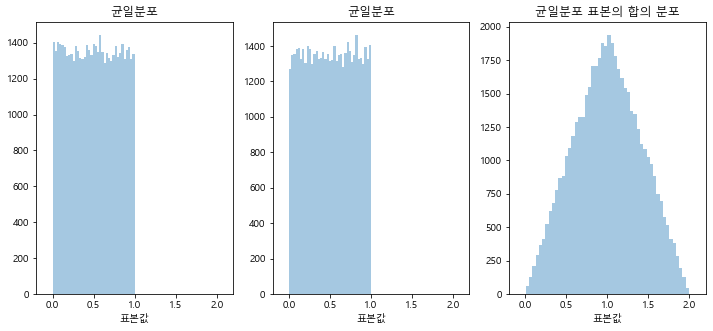

In [16]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)
x_3 = x_1 + x_2

plt.figure(figsize=(12, 5))

plt.subplot(131)
sns.distplot(x_1, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(132)
sns.distplot(x_2, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(133)
sns.distplot(x_3, kde=False)
plt.title("균일분포 표본의 합의 분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.show()